# Overweight Male Participants with Cardiovascular Disease (CVD)

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt

# The CSV file contains queried data for overweight males with CVD
df = pd.read_csv(r'C:\Users\User\OneDrive\Documents\Cardiohealth\Overweight_male_cvd.csv') 
print(df.head())

   age_in_years gender  glucose_ranking  cholesterol_ranking  body_mass_index  \
0         48.25   male                1                    1            28.71   
1         61.83   male                3                    3            29.98   
2         60.07   male                1                    3            27.40   
3         64.03   male                1                    1            27.43   
4         43.53   male                1                    1            28.39   

   smoker  alcohol  active  cardio_condition   bmi_class  
0       0        0       1                 1  Overweight  
1       0        0       1                 1  Overweight  
2       0        0       0                 1  Overweight  
3       1        0       1                 1  Overweight  
4       1        0       1                 1  Overweight  


In [59]:
# Convert 'smoker' to boolean
df['smoker'] = df['smoker'].apply(lambda x: True if x == 1 else False)

# Convert 'alcohol' to boolean
df['alcohol'] = df['alcohol'].apply(lambda x: True if x == 1 else False)

# Convert 'active' to boolean
df['active'] = df['active'].apply(lambda x: True if x == 1 else False)

# Rename the columns 'glucose_ranking' and 'cholesterol_ranking' to 'glucose_levels' and 'cholesterol_levels'
df = df.rename(columns={'glucose_ranking': 'glucose_levels'})
df = df.rename(columns={'cholesterol_ranking': 'cholesterol_levels'})

# Convert glucose_levels to text (standard categories)
# Define the mapping
mapping = {
    1: 'normal',
    2: 'above normal',
    3: 'well above normal'   
}
# Apply the mapping
df['glucose_levels'] = df['glucose_levels'].map(mapping)

# Convert cholesterol_levels to text (standard categories)
# Define the mapping
mapping = {
    1: 'normal',
    2: 'above normal',
    3: 'well above normal'   
}

# Apply the mapping
df['cholesterol_levels'] = df['cholesterol_levels'].map(mapping)

In [60]:
print(len(df))

5188


In [61]:
print(df.head())

   age_in_years gender     glucose_levels cholesterol_levels  body_mass_index  \
0         48.25   male             normal             normal            28.71   
1         61.83   male  well above normal  well above normal            29.98   
2         60.07   male             normal  well above normal            27.40   
3         64.03   male             normal             normal            27.43   
4         43.53   male             normal             normal            28.39   

   smoker  alcohol  active  cardio_condition   bmi_class  
0   False    False    True                 1  Overweight  
1   False    False    True                 1  Overweight  
2   False    False   False                 1  Overweight  
3    True    False    True                 1  Overweight  
4    True    False    True                 1  Overweight  


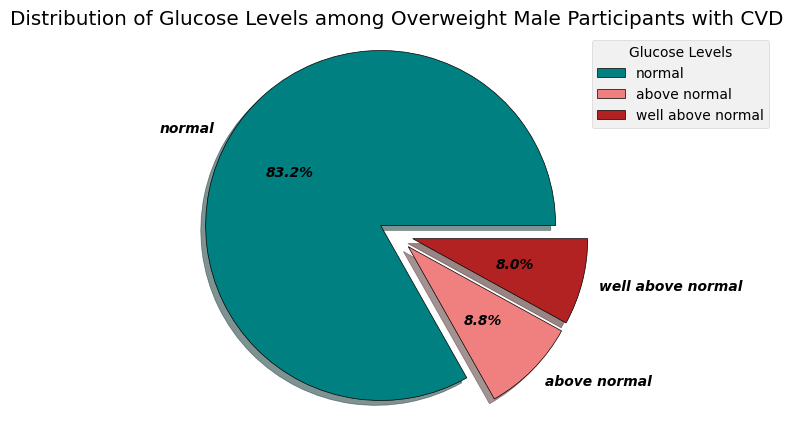

In [62]:
plt.style.use('bmh')

# Count occurrences of each glucose level
glucose_counts = df['glucose_levels'].value_counts()

# Calculate percentages
total_count = len(df)
percentages = (glucose_counts / total_count) * 100

# Create pie chart with custom labels
plt.figure(figsize=(7, 5))
colors = ('teal', 'lightcoral', 'firebrick')
explode = (0.1, 0.1, 0.1)
wp = {'linewidth':0.5, 'edgecolor':"black"}
textprops = {'fontstyle':'italic', 'fontweight':'heavy'}
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=0, 
        colors=colors, explode=explode, shadow=True, wedgeprops=wp, textprops=textprops)
plt.title('Distribution of Glucose Levels among Overweight Male Participants with CVD')
plt.legend(title='Glucose Levels', loc='upper right', bbox_to_anchor=(1.2, 1.0))
plt.axis('equal') 
plt.show() 

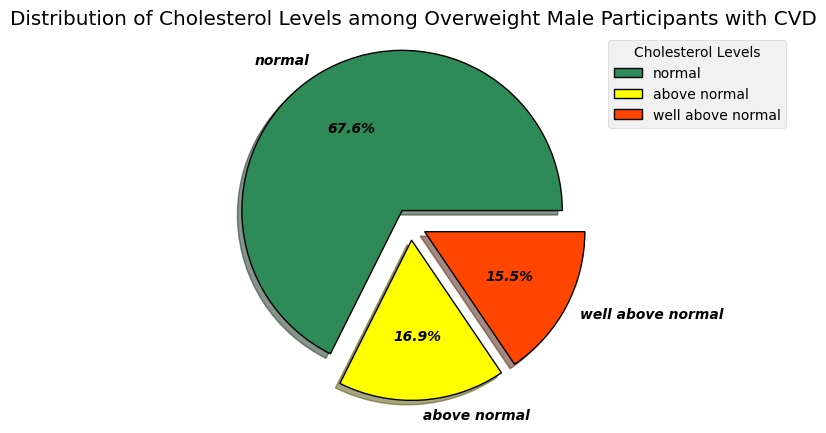

In [63]:
plt.style.use('bmh')

# Count occurrences of each glucose level
cholesterol_counts = df['cholesterol_levels'].value_counts()

# Calculate percentages
total_count = len(df)
percentages = (cholesterol_counts / total_count) * 100

# Create pie chart with custom labels
plt.figure(figsize=(7, 5))
colors = ('seagreen', 'yellow', 'orangered')
explode = (0.1, 0.1, 0.1)
wp = {'linewidth':1, 'edgecolor':"black"}
textprops = {'fontstyle':'italic', 'fontweight':'heavy'}
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=0, 
        colors=colors, explode=explode, shadow=True, wedgeprops=wp, textprops=textprops)
plt.title('Distribution of Cholesterol Levels among Overweight Male Participants with CVD')
plt.legend(title='Cholesterol Levels', loc='upper right', bbox_to_anchor=(1.2, 1.0))
plt.axis('equal') 
plt.show() 

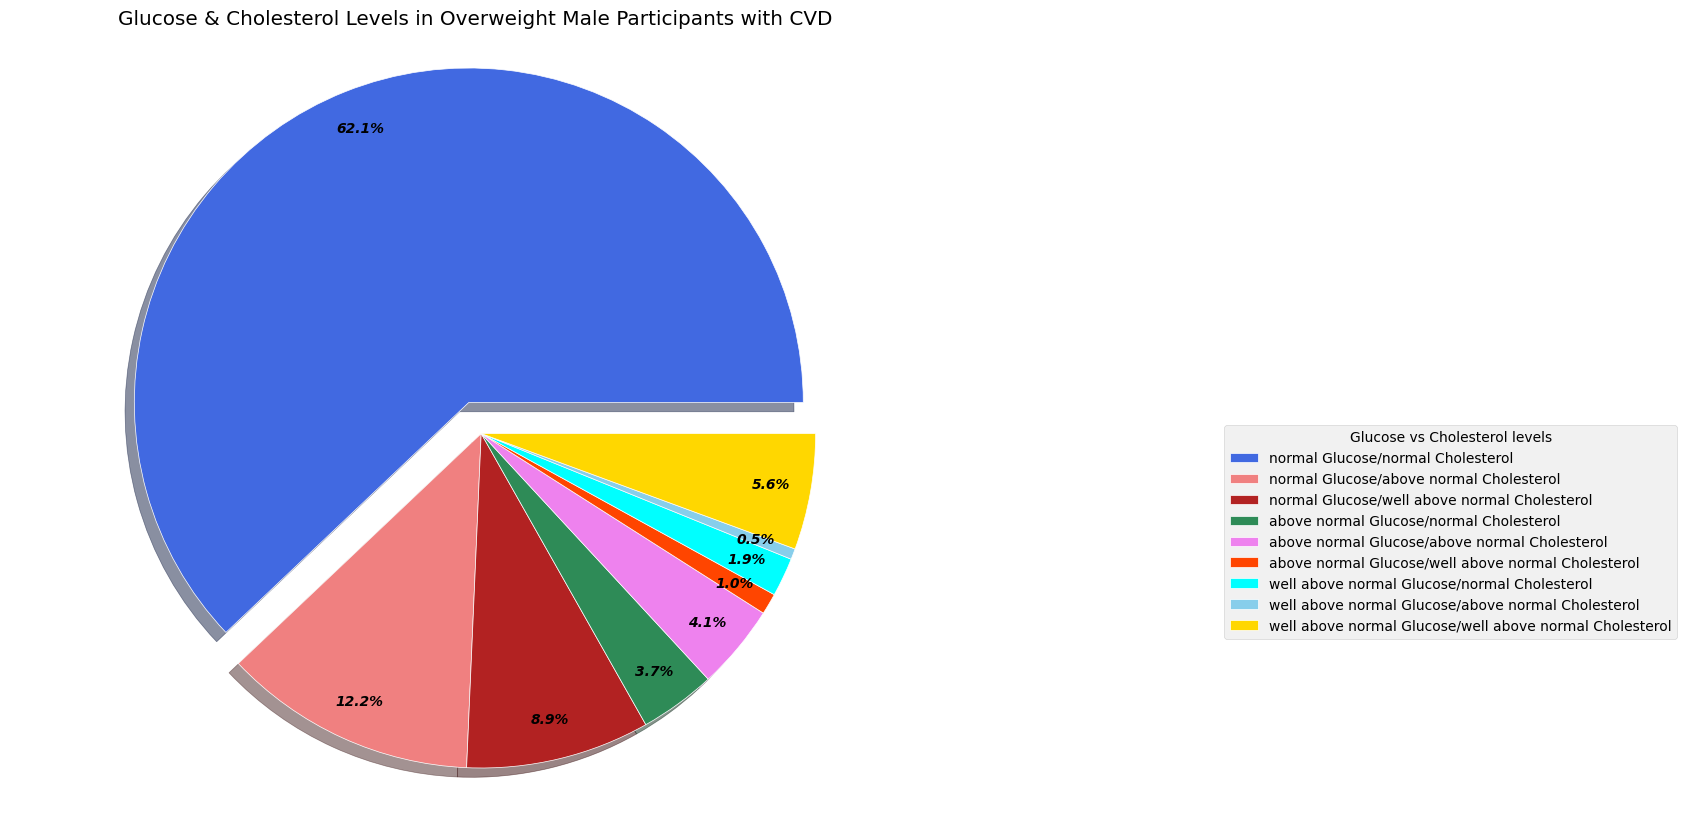

In [64]:
# Plot the combination of glucose levels and cholesterol levels (since they have 3 unique values each; 
# that would yield a total of (3*3) 9 combinations)

g1c1_count = ((df['glucose_levels'] == 'normal') & (df['cholesterol_levels'] == 'normal')).sum() 
g1c2_count = ((df['glucose_levels'] == 'normal') & (df['cholesterol_levels'] == 'above normal')).sum() 
g1c3_count = ((df['glucose_levels'] == 'normal') & (df['cholesterol_levels'] == 'well above normal')).sum() 
g2c1_count = ((df['glucose_levels'] == 'above normal') & (df['cholesterol_levels'] == 'normal')).sum() 
g2c2_count = ((df['glucose_levels'] == 'above normal') & (df['cholesterol_levels'] == 'above normal')).sum() 
g2c3_count = ((df['glucose_levels'] == 'above normal') & (df['cholesterol_levels'] == 'well above normal')).sum() 
g3c1_count = ((df['glucose_levels'] == 'well above normal') & (df['cholesterol_levels'] == 'normal')).sum() 
g3c2_count = ((df['glucose_levels'] == 'well above normal') & (df['cholesterol_levels'] == 'above normal')).sum() 
g3c3_count = ((df['glucose_levels'] == 'well above normal') & (df['cholesterol_levels'] == 'well above normal')).sum() 

# Plot Pie Chart
data = (g1c1_count, g1c2_count, g1c3_count, g2c1_count, g2c2_count, g2c3_count, g3c1_count, g3c2_count, g3c3_count)
chart_legend = ('normal Glucose/normal Cholesterol', 'normal Glucose/above normal Cholesterol' , 'normal Glucose/well above normal Cholesterol',
               'above normal Glucose/normal Cholesterol', 'above normal Glucose/above normal Cholesterol' , 
                'above normal Glucose/well above normal Cholesterol', 'well above normal Glucose/normal Cholesterol', 
                'well above normal Glucose/above normal Cholesterol' , 'well above normal Glucose/well above normal Cholesterol')

plt.figure(figsize=(12, 10))
colors = ('royalblue', 'lightcoral', 'firebrick', 'seagreen', 'violet', 'orangered', 'aqua', 'skyblue', 'gold')
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0)
wp = {'linewidth':0.5, 'edgecolor':"white"}
textprops = {'fontstyle':'italic', 'fontweight':'heavy'}
plt.pie(data, autopct='%1.1f%%', pctdistance=0.88, startangle=0, 
        colors=colors, explode=explode, shadow=True, wedgeprops=wp, textprops=textprops)
plt.title('Glucose & Cholesterol Levels in Overweight Male Participants with CVD')
plt.legend(chart_legend, title='Glucose vs Cholesterol levels', loc='upper right', bbox_to_anchor=(1.8, 0.5))
plt.axis('equal') 
plt.show() 


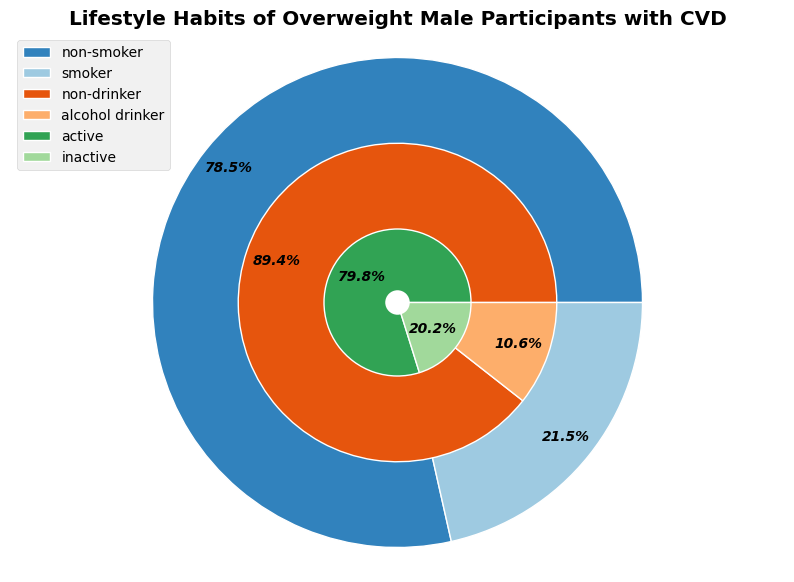

In [65]:
# Nested pie chart to show the impact of smoking, alcohol consumption and physical activity on CVD risk
x1 = df['smoker']
x2 = df['alcohol']
x3 = df['active']

# Count the number of smokers vs non_smokers, alcohol drinkers vs non-drinkers, active vs inactive participants
smoker_counts = x1.value_counts()
alcohol_counts = x2.value_counts()
active_counts = x3.value_counts()

# Calculate percentages
total_count = len(df)
smoker_percentage = (smoker_counts / total_count) * 100
alcohol_percentage = (alcohol_counts / total_count) * 100
active_percentage = (active_counts / total_count) * 100

# Create pie chart with custom labels
# Create the pie chart
plt.figure(figsize=(10, 7))

tab20c = plt.color_sequences["tab20c"]
colora = [tab20c[i] for i in [0, 2]]
colorb= [tab20c[i] for i in [4, 6,]]
colorc=  [tab20c[i] for i in [8, 10,]]

wp = {'linewidth':1, 'edgecolor':"white"}
textprops = {'fontstyle':'italic', 'fontweight':'heavy'}
plt.pie(smoker_percentage, pctdistance=0.88, autopct='%1.1f%%', startangle=0, 
        radius=1.0, colors=colora, wedgeprops=wp, textprops=textprops
       )

plt.pie(alcohol_percentage, pctdistance=0.80, autopct='%1.1f%%', startangle=0, 
        radius=0.65, colors=colorb, wedgeprops=wp, textprops=textprops)

plt.pie(active_percentage, pctdistance=0.60, autopct='%1.1f%%', startangle=0, 
        radius=0.30, colors=colorc, wedgeprops=wp, textprops=textprops)


centre_circle = plt.Circle((0,0),0.05,fc = 'white')
group_legs=['non-smoker', 'smoker', 'non-drinker', 
'alcohol drinker', 'active', 'inactive']
plt.legend(group_legs,loc='upper left')
plt.title('Lifestyle Habits of Overweight Male Participants with CVD', fontweight = 'bold')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal') 
plt.show() 

In [66]:
# Calculate the min age
min_age = df['age_in_years'].min()

# Calculate the max age
max_age = df['age_in_years'].max()

# Calculate the mean age
mean_age = df['age_in_years'].mean()

# Calculate the median age
median_age = df['age_in_years'].median()

print(f"Min Age: {min_age}")
print(f"Mean Age: {mean_age}")
print(f"Max Age: {max_age}")
print(f"Median Age: {median_age}")

Min Age: 39.14
Mean Age: 54.59707594448728
Max Age: 64.77
Median Age: 55.565


In [67]:
import altair as alt

# Calculate age frequencies by sex
age_counts = df.groupby('age_in_years')['age_in_years'].count().reset_index(name='agefrequency')
# Create a histogram using Altair
chart = alt.Chart(age_counts).mark_bar(color='navy').encode(
    x=alt.X('age_in_years', bin=True, title='Age'),
    y=alt.Y('agefrequency', title='Frequency'),
    tooltip=['age_in_years', 'agefrequency']
).properties(
    title='Age Distribution Histogram for Overweight BMI Males with CVD'
).interactive()

# Save the chart
chart.save('distribution_of_age_for_owmales_cvd.json')

# Display the chart
chart.show() 

alt.Chart(...)